<a href="https://colab.research.google.com/github/Huillotl/01h1/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tablero inicial:


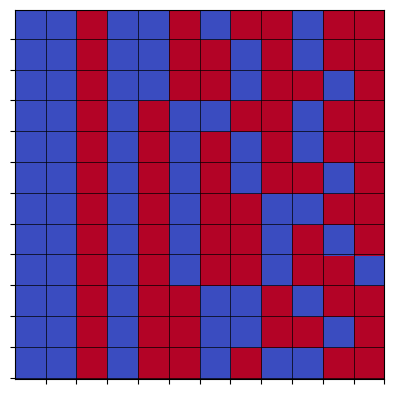

Vecino aleatorio:
Ejecutando Recocido Simulado...
Se Usaron todas las iteraciones 1


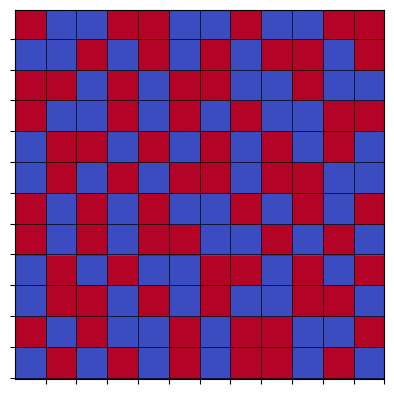

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

def generate_valid_bitstrings(n):
    """Genera todas las cadenas binarias de longitud n con n/2 unos,
    y que no tengan tres bits consecutivos iguales."""
    bit_strings = []
    for i in range(2**n):
        binary = bin(i)[2:].zfill(n)
        if binary.count('1') != n // 2:
            continue
        if '000' in binary or '111' in binary:
            continue
        bit_strings.append([int(b) for b in binary])
    return np.array(bit_strings)

def imprimir_tablero(tab):
    plt.imshow(tab, cmap='coolwarm')

    plt.yticks(np.arange(tab.shape[0]) + 0.45, [])
    plt.xticks(np.arange(tab.shape[0]) + 0.50, [])
    plt.gca().set_aspect('equal')
    plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='black')
    plt.show()

def cost(tab,posicion_objetivo=None,valor_objetivo=None):
    """Calcula un puntaje basado en cuántas reglas se violan."""
    n = len(tab)
    violations = 0
    cols=[]
    if posicion_objetivo is not None and valor_objetivo is not None:
        for pos, val in zip(posicion_objetivo, valor_objetivo):
            row, col = pos
            if tab[row, col] != val:
                violations += 1
    for i in range(n):
        col = tab[:, i]
        if np.count_nonzero(col == 0) != n // 2:
            violations+=1
        for j in range(n - 2):
            if col[j] == col[j+1] == col[j+2]:
                violations+=13
        cols.append(col)
    cols=np.array(cols)
    violations+=n-np.unique(cols,axis=0).shape[0]
    return violations



def obtener_complemento(inicial, validos):
    return [x for x in validos if not any(np.array_equal(x, y) for y in inicial)]

def vecino_aleatorio(tab, validos):
    """Genera una variación del tablero modificando una fila aleatoria."""
    disponibles = obtener_complemento(tab, validos)
    n = tab.shape[0]
    new_tab = tab.copy()
    fila = random.randint(0, n - 1)
    nueva_fila = disponibles[random.randint(0, len(disponibles) - 1)]
    new_tab[fila] = nueva_fila
    return new_tab

def simulated_annealing(board, validos,posicion_objetivo,valores_objetivo, max_iter=100000, temp=1000, cooling_rate=0.0.9921875, temp_min=1e-20):
    current_board = board.copy()
    current_cost = cost(current_board)

    for i in range(max_iter):
        temp *= cooling_rate
        if temp <= temp_min:
            print("Temperatura 0",i)
            break

        vecino = vecino_aleatorio(current_board, validos)
        costo = cost(vecino,posicion_objetivo,valores_objetivo)

        if costo == 0:
            print("SOLUCIONADO")
            return vecino

        delta = costo - current_cost
        if delta < 0 or random.uniform(0, 1) < math.exp(-delta / temp):
            current_board = vecino
            current_cost = costo
    print("Se Usaron todas las iteraciones", current_cost)
    return current_board



n = 12#Tiene que ser un nuero par
columnas_validas = generate_valid_bitstrings(n)
inicial = columnas_validas[:n]
posicion_objetivo = [(0, 0), (6, 6), (4, 3)]
valores_objetivo = [1, 0, 1]

print("Tablero inicial:")

imprimir_tablero(inicial)

print("Vecino aleatorio:")
#vecino = vecino_aleatorio(inicial, columnas_validas)
#imprimir_tablero(vecino)

print("Ejecutando Recocido Simulado...")
resultado = simulated_annealing(inicial, columnas_validas,posicion_objetivo,valores_objetivo)
#k=np.zeros_like(inicial)
#k[:, 1] = inicial[:, 2]

imprimir_tablero(resultado)


Visualización con Matplotlib:


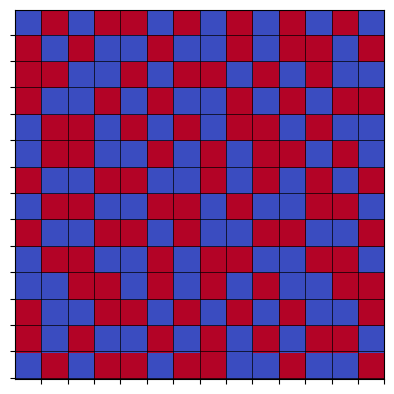

In [ ]:
import matplotlib.pyplot as plt
def imprimir_tablero(tab):
    plt.imshow(tab, cmap='coolwarm')

    plt.yticks(np.arange(tab.shape[0]) + 0.45, [])
    plt.xticks(np.arange(tab.shape[0]) + 0.50, [])
    plt.gca().set_aspect('equal')
    plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='black')
    plt.show()

# Ejemplo de uso con el resultado
print("Visualización con Matplotlib:")
imprimir_tablero(resultado)
